# ME 6210 Lab Notes

Lab 1
===

Identification of Damping Using Log Decrement


In [2]:
%load_ext autoreload
%autoreload 2
import vibration_toolbox as vtb
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import math as math

Experimental Data Plots
--------------------------

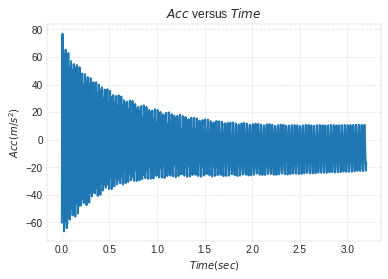

In [3]:
# Acc vs Time

%matplotlib inline
mat_contents=sio.loadmat('Case2.mat')
Time = mat_contents['Time_domain']
b = mat_contents['Time_chan_2']
# The acceleration values from Bobcat will be in Gs. So,  to convert them to m/s^2,
# we will have to multiply the vector by 9.81
Acc=b*9.81 
plt.plot(Time,Acc)
plt.grid('on')
plt.ylabel('$Acc(m/s^2)$')
plt.xlabel('$Time(sec)$')
plt.title('$Acc$ versus $Time$')
plt.show()

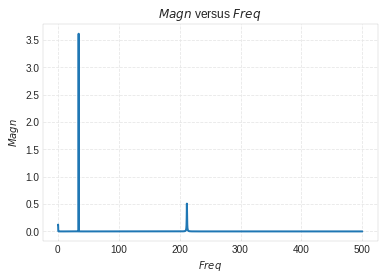

In [4]:
# Mag vs Freq

%matplotlib inline
mat_contents=sio.loadmat('Case2.mat')
c = mat_contents['Freq_domain']
d = mat_contents['MagSpec_chan_2']
plt.plot(c,d)
plt.grid('on')
plt.xlabel('$Freq$')
plt.ylabel('$Magn$')
plt.title('$Magn$ versus $Freq$')
plt.show()

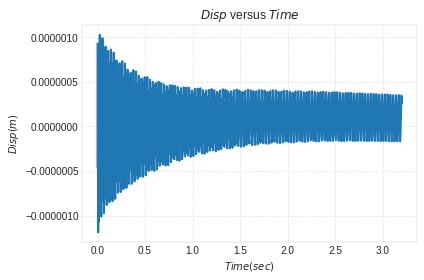

In [5]:
#  Experimental Results

Td= (Time[60]-Time[0])/60
Wd=(2*math.pi)/Td
Disp=Acc/(-Wd**2)
plt.plot(Time,Disp)
plt.grid('on')
plt.ylabel('$Disp(m)$')
plt.xlabel('$Time(sec)$')
plt.title('$Disp$ versus $Time$')
plt.show()

    

In [6]:
delta=(1/60)*(math.log(Disp[0]/Disp[60]))
zeta=(delta)/(math.sqrt((4*(math.pi)**2)+(delta)**2))
Wn=Wd*math.sqrt(1-(zeta)**2)
zeta

0.0005550176566133413

Using Vibration Toolbox
--------------------------

In [16]:

E=7.31e10
b1=0.0254
h=0.0127
l=0.5524
r=2.7*(10**3)
v=l*b1*h
m=r*v
I=(1/12)*b1*(h**3)
k=(3*E*I)/(l**3)
#Wn=(k/m)**(1/2)
#v0=b(1)*a(1)
#x0=0
ccr=2*math.sqrt(k*m)
c=ccr*zeta
vtb.free_response(m=r*v, c=c, k=(3*E*I)/(l**3), x0=0, v0=Time[1]*Acc[1], max_time=3.5) 


(array([ 0.        ,  0.00400458,  0.00800915,  0.01201373,  0.01601831,
         0.02002288,  0.02402746,  0.02803204,  0.03203661,  0.03604119,
         0.04004577,  0.04405034,  0.04805492,  0.0520595 ,  0.05606407,
         0.06006865,  0.06407323,  0.0680778 ,  0.07208238,  0.07608696,
         0.08009153,  0.08409611,  0.08810069,  0.09210526,  0.09610984,
         0.10011442,  0.10411899,  0.10812357,  0.11212815,  0.11613272,
         0.1201373 ,  0.12414188,  0.12814645,  0.13215103,  0.13615561,
         0.14016018,  0.14416476,  0.14816934,  0.15217391,  0.15617849,
         0.16018307,  0.16418764,  0.16819222,  0.1721968 ,  0.17620137,
         0.18020595,  0.18421053,  0.1882151 ,  0.19221968,  0.19622426,
         0.20022883,  0.20423341,  0.20823799,  0.21224256,  0.21624714,
         0.22025172,  0.22425629,  0.22826087,  0.23226545,  0.23627002,
         0.2402746 ,  0.24427918,  0.24828375,  0.25228833,  0.25629291,
         0.26029748,  0.26430206,  0.26830664,  0.2

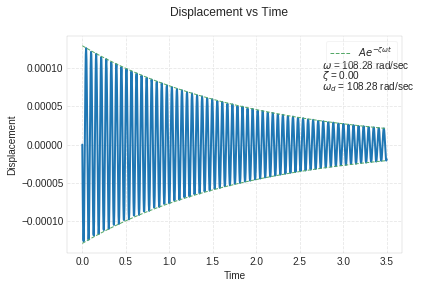

In [20]:
vtb.time_plot(m=r*v, c=0.5, k=(3*E*I)/(l**3), x0=0, v0=Time[1]*Acc[1], max_time=3.5)